# Data Exploration of Used Cars Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
carsFull = pd.read_csv('vehicles.csv', nrows=120000) #take 10k rows due to memory limitations
cars = carsFull.sample(n=10000)
del(carsFull)

In [3]:
#Remove clearly redundant features
cars = cars.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'], axis=1)
#Unnamed and id columns will have no correlation
#Url and region url are links to pages that data was scraped from, again obviously no correlation
#image url, could use computer vision on this but this is outside scope

Number of Features =  21

Percentage Empty Features: 
region : Percentage Empty:  0.0
price : Percentage Empty:  0.0
year : Percentage Empty:  0.0
manufacturer : Percentage Empty:  0.0
model : Percentage Empty:  0.0
condition : Percentage Empty:  38.82934005884825
cylinders : Percentage Empty:  36.6015132408575
fuel : Percentage Empty:  0.0
odometer : Percentage Empty:  12.211013030685162
title_status : Percentage Empty:  0.47288776796973514
transmission : Percentage Empty:  0.451870533837747
VIN : Percentage Empty:  39.722572509457756
drive : Percentage Empty:  29.918032786885245
size : Percentage Empty:  69.45145018915511
type : Percentage Empty:  21.385035729298025
paint_color : Percentage Empty:  28.11055065153426
description : Percentage Empty:  0.010508617065994114
state : Percentage Empty:  0.0
lat : Percentage Empty:  0.5674653215636822
long : Percentage Empty:  0.5674653215636822
posting_date : Percentage Empty:  0.0


,price,year,odometer,lat,long
count,9.516000e+03,9516.000000,8.354000e+03,9462.000000,9462.000000
mean,1.582147e+04,2010.987285,9.183675e+04,35.244791,-101.201659
std,3.798001e+04,8.488399,1.339768e+05,6.447106,19.567708
min,0.000000e+00,1925.000000,0.000000e+00,24.563320,-151.717600
25%,5.496500e+03,2008.000000,4.003400e+04,31.639843,-119.020000
50%,1.199950e+04,2013.000000,8.148000e+04,34.184850,-104.785056
75%,2.199500e+04,2016.000000,1.269778e+05,38.608933,-82.445500
max,3.429900e+06,2021.000000,1.000000e+07,64.878089,-70.642000


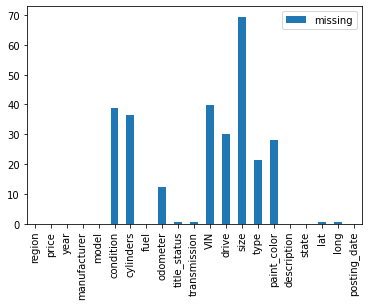

In [75]:
print("Number of Features = ", len(cars.columns))
print("\nPercentage Empty Features: ")
missingInFeature = pd.DataFrame(columns=cars.columns)
for feature in cars.columns:
    print(feature, ": ", end="") 
    percentEmpty = cars[feature].isna().sum()/len(cars[feature])*100
    print("Percentage Empty: ", percentEmpty)
    missingInFeature.at[0, feature] = percentEmpty
    
df = pd.DataFrame({'feature':missingInFeature.columns, 'missing':missingInFeature.loc[0]})
df.plot.bar()

#Mean and variance
cars.describe()

In [74]:
cars = cars.drop(cars[cars['model'].isna()].index, axis=0).drop(cars[cars['manufacturer'].isna()].index, axis=0)

In [5]:
#Fill empty fuel
for i, entry in cars[cars['fuel'].isna()].iterrows():
    model = entry['model']
    fuel = cars[cars['model'] == model]['fuel'].mode()
    if fuel.empty:
        fuel = "NaN"
    else:
        fuel = fuel.values
    cars.loc[i, 'fuel'] = fuel

In [77]:
cars.corr(method='pearson', min_periods=1)

,price,year,odometer,lat,long
price,1.000000,0.107065,-0.080144,-0.000174,-0.003296
year,0.107065,1.000000,-0.230020,0.014259,-0.007038
odometer,-0.080144,-0.230020,1.000000,-0.022528,0.032443
lat,-0.000174,0.014259,-0.022528,1.000000,-0.571335
long,-0.003296,-0.007038,0.032443,-0.571335,1.000000


In [2]:
ax = plt.matshow(cars.corr())
display(cars["type"].astype('category').cat.codes)
print(cars.loc[111364]['type'])
print(cars.loc[111072]['type'])

NameError: name 'plt' is not defined

In [76]:
cars['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', nan, 'lien', 'parts only',
       'missing'], dtype=object)